![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 003 - Part III

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 28/08/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0003Part003.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

from scipy.sparse.linalg import svds, eigsh

# Machine Learning
from sklearn.datasets import fetch_openml, load_breast_cancer, load_digits, load_iris, load_wine, make_s_curve

# Computer Vision

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [2]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

DATA_FILE_URL   = r'None'
DATA_FILE_NAME  = r'None'

T_MNIST_IMG_SIZE = (28, 28)

TOTAL_RUN_TIME = 10 #<! Don't touch it!


In [4]:
# Auxiliary Functions

def BalancedSubSample( dfX: pd.DataFrame, colName: str, numSamples: int ):
    
    # TODO: Validate the number of samples
    # TODO: Validate the column name (Existence and categorical values)
    return dfX.groupby(colName, as_index = False, group_keys = False).apply(lambda dfS: dfS.sample(numSamples, replace = False))

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported make it clear by a comment.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [5]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 10 [Sec]


## Team Members

 - `<FULL>_<NAME>_<ID001>`.
 - `<FULL>_<NAME>_<ID002>`.

* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.
* <font color='brown'>(**#**)</font> The total run time of this notebook must be **lower than 60 [Sec]**.

In [6]:
# Students Packages to Import
# If you need a package not listed above, use this cell
# Do not use `pip install` in the submitted notebook



## Generate / Load Data

In [7]:
# Download Data
# This section downloads data from the given URL if needed.

if (DATA_FILE_NAME != 'None') and (not os.path.exists(DATA_FILE_NAME)):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 5. Kernel PCA (K-PCA / KPCA)

### 5.1. Kernel PCA Algorithm

In this section we'll implement a SciKit Learn API compatible class for the Kernel PCA.  
The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
   The input will include the encoder dimension `d` and a callable function for the kernel.
2. `fit()` - Given a data set builds the encoder.  
3. `transform()` - Applies the encoding on the input data.   

* <font color='brown'>(**#**)</font> You may use the [SciKit Learn's Kernel PCA module](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) as a reference.
* <font color='brown'>(**#**)</font> Both encoding and decoding applied as out of sample encoding / decoding.
* <font color='brown'>(**#**)</font> Pay attention to data structure (`N x D`).
* <font color='brown'>(**#**)</font> You may assume the kernel function `k` ($ k : \, \mathbb{R}^{D} \times \mathbb{R}^{D} \to \mathbb{R} $) has the following signature:

```python
def k(mX1: np.ndarray, mX2: np.ndarray)
    '''
    Computes the kernel function between two sets of vectors.
    Args:
        mX1 - Input data with shape N1 x D.
        mX2 - Input data with shape N2 x D.
    Output:
        mKx - Output kernel matrix with shape N1 x N2.
    '''
```


In [8]:
class KPCA:
    def __init__(self, d: int = 2, k: Callable = lambda x: x):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
            k - A kernel function (Callable).
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.encoder_dim = d
        self.kernel_func = k
        self.mX = None
        self.mK = None
        self.mKc = None # Centered kernel matrix
        self.mUd = None
        self.mSd = None
        self.mVTd = None
        #===============================================================#
        
    def fit(self, mX: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mX - Input data with shape N x D.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build the model encoder.
        # 2. Optimize calculation by the dimensions of `mX`.
        # !! You may find `scipy.sparse.linalg.svds()` useful.
        # !! You may find `scipy.sparse.linalg.eigsh()` useful.
        # Do not use `J` explicitly as a matrix multiplication.

               # Store original data matrix
        self.mX = mX

        # Calculate mK (kernel matrix)
        mK = self.kernel_func(mX, mX)
        self.mK = mK

        # Centerize the kernel matrix mK
        n_samples = mK.shape[0]
        mK_rows_mean = np.sum(mK, axis=0) / n_samples
        mKc = mK - mK_rows_mean
        mKc_cols_mean = np.sum(mKc, axis=1) / n_samples
        mKc = mKc - mKc_cols_mean[:, np.newaxis]
        self.mKc = mKc

        # Compute the EVD for mKc
        eigenvalues, eigenvectors = eigsh(mKc, k=self.encoder_dim)
        self.mVd = eigenvectors
        self.mSd = np.diag(np.square(eigenvalues))
        self.mVTd = eigenvectors.transpose()
        
        #===============================================================# 
        return self
    
    def transform(self, mX: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) encoding
        Args:
            mX - Input data with shape N x D.
        Output:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model encoder.
        
        # Calculate mK*
        mKstar = self.kernel_func(self.mX, mX)

        # Substract the mean of mKc's columns
        n_samples = self.mK.shape[0]

        mKc_cols_mean = np.sum(self.mKc, axis=1) / n_samples
        mKstar -= mKc_cols_mean[:, np.newaxis]

        # Center the rows of given mKstar
        mKstar_rows_mean = np.sum(mKstar, axis=0) / n_samples
        mKstar = mKstar - mKstar_rows_mean

        # Multiply by mSd and mVTd to get the embeddings of the OOS data
        mZ = np.matmul(np.matmul(np.linalg.inv(self.mSd), self.mVTd), self.mKc)
        #===============================================================#

        return mZ
    


* <font color='red'>(**?**)</font> Why `inverse_transform()` is not implemented? You may read about SciKit Learn's `inverse_transform()`.

### 5.2. K-PCA Application

In this section the K-PCA (Using the above class) will be applied on several data sets:

 * Breast Cancer Dataset - Loaded using `load_breast_cancer()`.
 * Digits Dataset - Loaded using `load_digits()`.
 * Iris Dataset - Loaded using `load_iris()`.
 * Wine Dataset - Loaded using `load_wine()`.

For each data set:

1. Make yourself familiar with the data set:
    * How many features are there ($D$).
    * How many samples are there ($N$).
    * Do all features have the same unit?
2. Apply a Pre Process Step  
   In ML, usually, if the features do not have the same unit they are normalized.  
   Namely, make each feature with zero mean and unit standard deviation.   
   Write a function to normalize input data.
3. Apply the K-PCA  
   Set `d` to be visualization friendly and apply PCA from $D$ to $d$.  
   The obtained the low dimensional data represents $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$.  
   You should use the following kernels (Implemented by yourself):
     * $k \left( \boldsymbol{x}_{i}, \boldsymbol{x}_{j} \right) = \boldsymbol{x}_{i}^{T} \boldsymbol{x}_{j}$.
     * $k \left( \boldsymbol{x}_{i}, \boldsymbol{x}_{j} \right) = \left(1 + \boldsymbol{x}_{i}^{T} \boldsymbol{x}_{j} \right)^{p}$.  
       You should set a reasonable $p$.
     * $k \left( \boldsymbol{x}_{i}, \boldsymbol{x}_{j} \right) = \exp \left( - \frac{\left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\|_{2}^{2}}{2 {\sigma}^{2}} \right)$.  
       You should set a reasonable $\sigma$.
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to the data labels.  
   For each data set show result with the normalization step and without it.


* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> The output should be 2 figures for each data set and kernel. You may show them in a single plot using sub plots.

In [9]:
#===========================Fill This===========================#
# 1. Implement the normalization function.
# !! Make sure to address the remark.

def NormalizeData(mX: np.ndarray) -> np.ndarray:
    '''
    Normalize data so each feature has zero mean and unit standard deviation.
    Args:
        mX  - Input data with shape N x d.
    Output:
        mY  - Output data with shape N x d.
    Remarks:
        - Features with zero standard deviation are not scaled (Only centered).
    '''

    # Compute the standard deviation of each feature
    mx_std = mX.std(0)
    # Replace 0's with 1's for feature with zero std, so that the division will not affect such features
    np.place(mx_std, mx_std==0, [1])

    mY = (mX - mX.mean(0)) / mx_std
    return mY

#===============================================================#

In [10]:
#===========================Fill This===========================#
# 1. Implement the 3 kernels.
# !! Make sure to address the remarks.
# !! Pay attention that `np.dot(mA.T, mA)` is faster (Symmetric aware) than `mA.T @ mA`.

def KernelInnerProduct( mX1: np.ndarray, mX2: np.ndarray ) -> np.ndarray:
    '''
    Calculates the kernel matrix of the Inner Product kernel.
    Args:
        mX1 - Input data with shape N1 x D.
        mX2 - Input data with shape N2 x D.
    Output:
        mKx - Output data with shape N1 x N2.
    Remarks:
        - The function is implemented without explicit loops.
    '''

    mKx = np.dot(mX1, mX2.T)
    
    return mKx

def KernelPolynomial( mX1: np.ndarray, mX2: np.ndarray, p: int = 2 ) -> np.ndarray:
    '''
    Calculates the kernel matrix of the Polynomial kernel.
    Args:
        mX1 - Input data with shape N1 x D.
        mX2 - Input data with shape N2 x D.
        p   - The degree of the model.
    Output:
        mKx - Output data with shape N1 x N2.
    Remarks:
        - The function is implemented without explicit loops.
    '''

    N1 = mX1.shape[0]
    N2 = mX2.shape[0]

    mKx = np.dot(mX1, mX2.T)
    mKx = mKx + np.ones((N1, N2))
    mKx = np.power(mKx, p)
    
    return mKx

def KernelGaussian( mX1: np.ndarray, mX2: np.ndarray, σ2: float = 12 ) -> np.ndarray:
    '''
    Calculates the kernel matrix of the Gaussian kernel.
    Args:
        mX1 - Input data with shape N1 x D.
        mX2 - Input data with shape N2 x D.
        σ2  - The variance of the model.
    Output:
        mKx - Output data with shape N1 x N2.
    Remarks:
        - The function is implemented without explicit loops.
    '''

    N1 = mX1.shape[0]
    N2 = mX2.shape[0]

    mNorm1 = np.power(sp.linalg.norm(mX1, axis=1, ord=2), 2).reshape(N1,1)
    mNorm2 = np.power(sp.linalg.norm(mX2, axis=1, ord=2), 2)

    mKx = mNorm1 - 2*KernelInnerProduct(mX1,mX2) + mNorm2

    mKx = mKx / ((-2) * np.power(σ2, 2))
    mKx = np.exp(mKx)
    
    return mKx

#===============================================================#

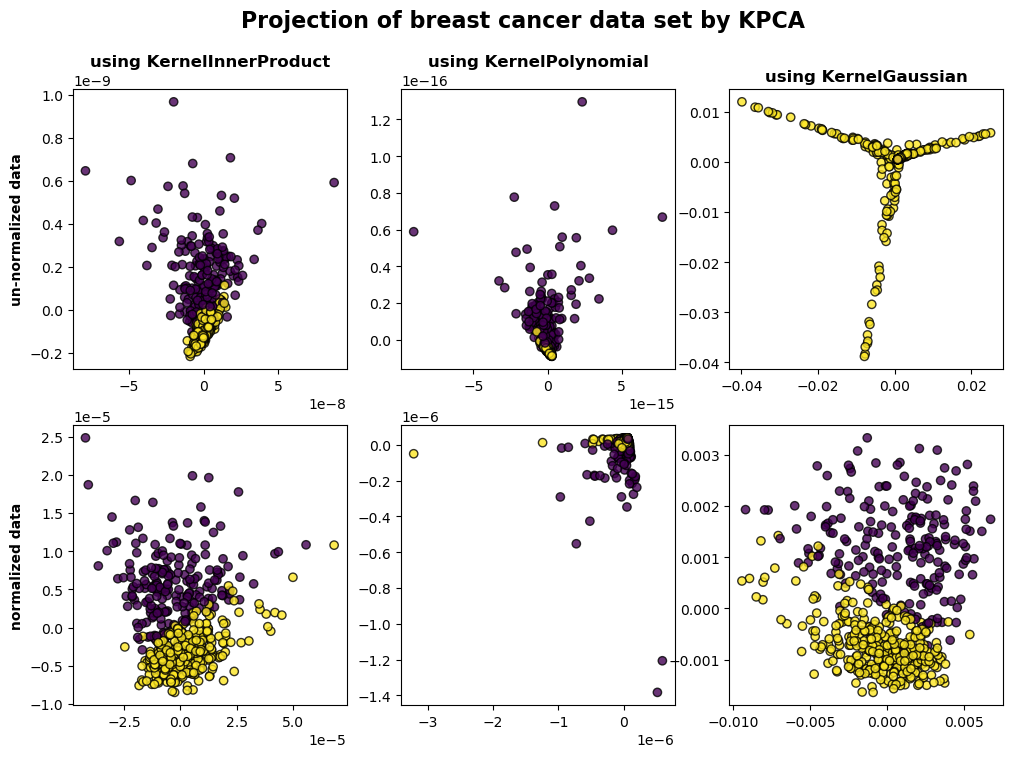

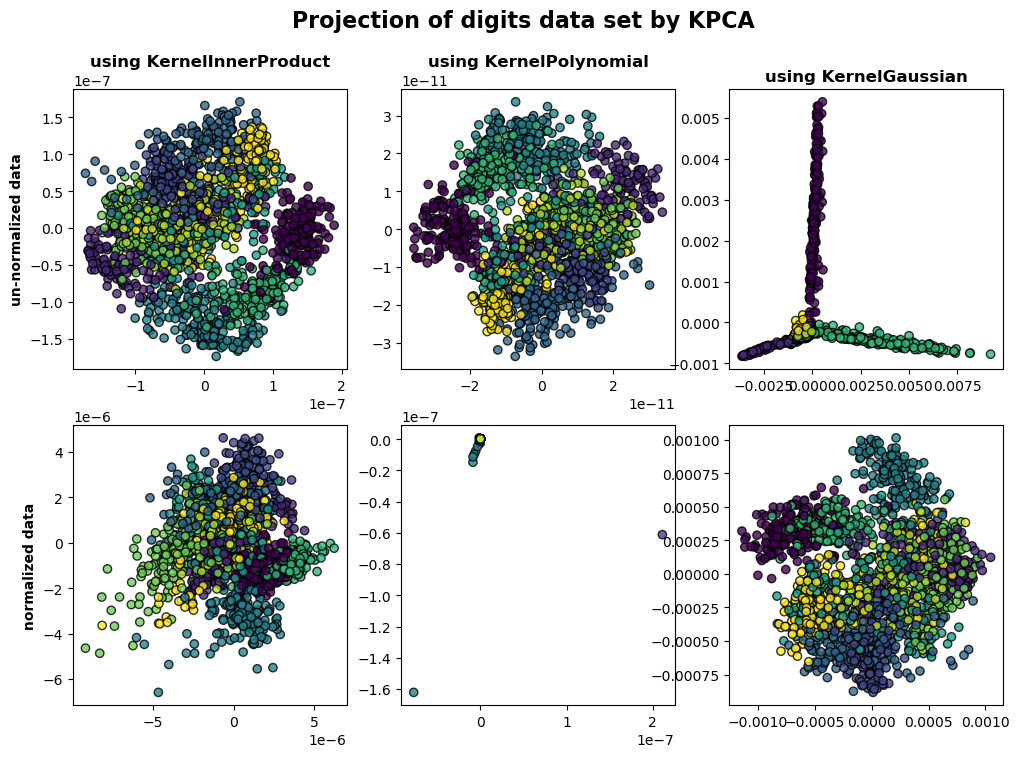

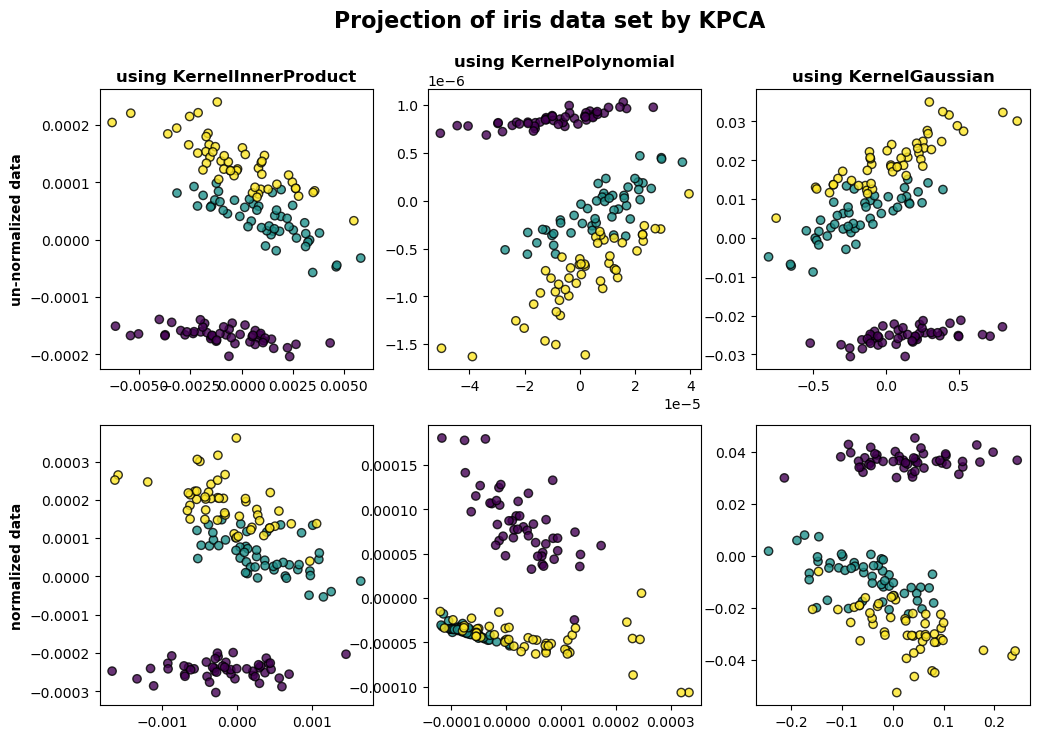

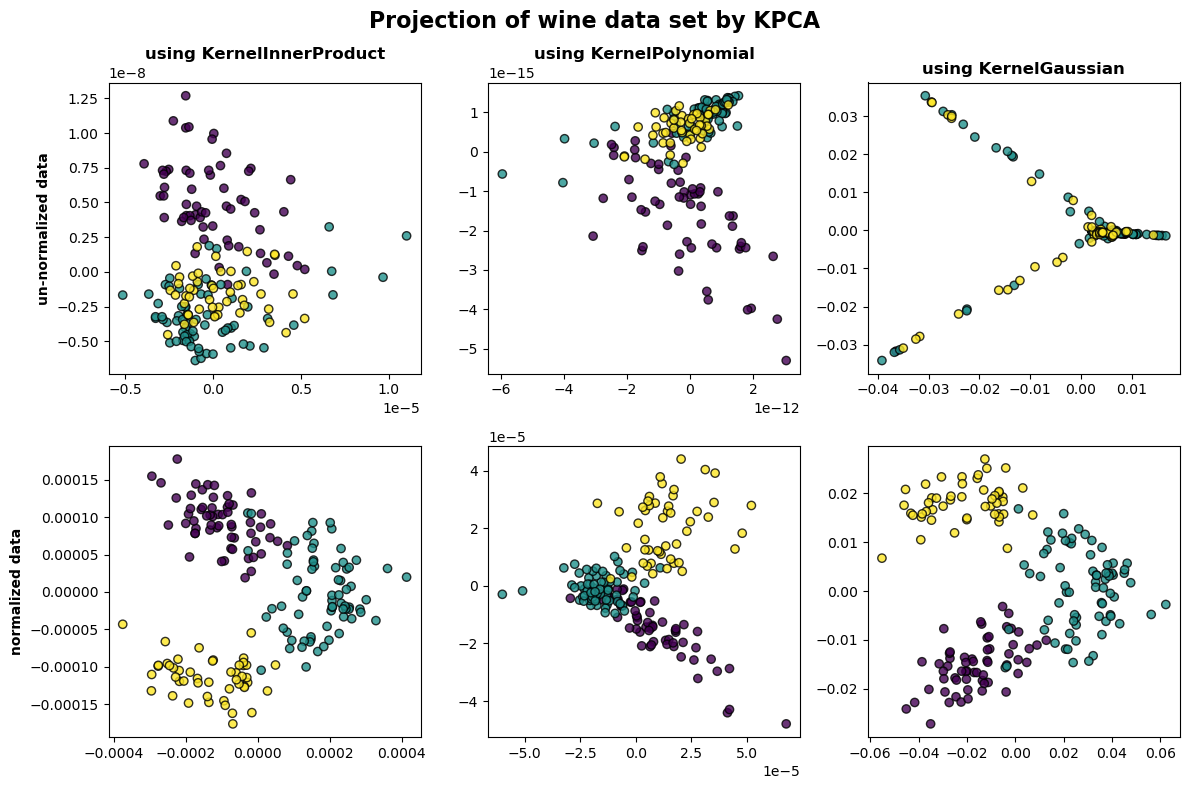

In [11]:
#===========================Fill This===========================#
# 1. Set parameter `d`.
# 2. Load each data set.
# 3. Apply PCA to each data set with and without normalization.
# 4. Display results as scatter data.

# number of dimensions
d = 2

dataset_names = ["breast cancer", "digits", "iris", "wine"]
datasets = [load_breast_cancer, load_digits, load_iris, load_wine]
kernel_functions_names = ["KernelInnerProduct", "KernelPolynomial", "KernelGaussian"]
kernel_functions = [KernelInnerProduct, KernelPolynomial, KernelGaussian]

for dataset_name, dataset in zip(dataset_names, datasets):
  fig, axes = plt.subplots(nrows=2, ncols=len(kernel_functions), figsize=(12, 8))
  fig.suptitle(f'Projection of {dataset_name} data set by KPCA', fontsize=16, fontweight='bold')
  axes[0,0].set_ylabel(f'un-normalized data', fontweight="bold")
  axes[1,0].set_ylabel(f'normalized data', fontweight="bold")

  mX, vY = dataset(return_X_y=True)

  for j, kernel_function in enumerate(kernel_functions):
    kernel_pca = KPCA(d, kernel_function)
    kernel_pca = kernel_pca.fit(mX)
    mZ = kernel_pca.transform(mX)

    ax = axes[0, j]
    scatter = ax.scatter(*mZ, c=vY, edgecolors='k', alpha=0.8)

    unique_labels = np.unique(vY)

    ax.set_title(f'using {kernel_functions_names[j]}', fontweight="bold")

    norm_mX = NormalizeData(mX)
    kernel_pca_norm = KPCA(d, kernel_function)
    kernel_pca_norm = kernel_pca_norm.fit(norm_mX)
    norm_mZ = kernel_pca_norm.transform(norm_mX)

    ax = axes[1, j]
    ax.scatter(norm_mZ[0,:], norm_mZ[1,:], c=vY, edgecolors='k', alpha=0.8)

plt.tight_layout()
plt.show()


#===============================================================#

### 5.3. Question

In the above, compare the results of the _Inner Product_ kernel to the PCA from the previous part.  
Explain the results.

### 5.3. Solution

Comparing the results of the InnerProduct kernel to the PCA from the previous part shows that the two are rotation of each other.
In general, using kernel PCA means that the dimension reduction is applied on the transformion of the original data, while the transformation itself depends on the given kernel function. As seen in class - given kernel function we can infer the non-linear tranformation behind it. In our case - InnerProduct kernel - the transformation could be rotation of the data (multiply each sample vector by rotation matrix), that is because the dot product is invariant under rotation.

Let's define the following trasformation for some rotation matrix R:

$$ \phi \left( \boldsymbol{x}_{i} \right) = R \boldsymbol{x}_{i} $$

Thus:

$$ \left \langle \phi \left( \boldsymbol{x}_{i} \right), \phi \left( \boldsymbol{x}_{j} \right) \right \rangle = \left \langle R \boldsymbol{x}_{i}, R \boldsymbol{x}_{j}\right \rangle = R^TR \left \langle \boldsymbol{x}_{i}, \boldsymbol{x}_{j}\right \rangle = I \left \langle \boldsymbol{x}_{i}, \boldsymbol{x}_{j}\right \rangle = \left \langle \boldsymbol{x}_{i}, \boldsymbol{x}_{j}\right \rangle = k \left( \boldsymbol{x}_{i}, \boldsymbol{x}_{j} \right)$$


---

### 5.4. Kernel PCA with Geodesic Distance (Bonus 4 Points)

In this question we'll build a pseudo _geodesic distance_ and apply the Kernel PCA.

In this section:

 1. Generate 750 samples of S Curve manifold (2D in 3D) using SciKit Learn's [`make_s_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html).  
    Make sure to read about its output, specifically `t`.    
    This is already implemented.
 2. Build a pair wise distance function utilizing both the data coordinates and the `vT` variable.  
    Since the `vT` variable holds location data, this is a geodesic like distance.
 3. Show the distance for 3 different points.  
    This is already implemented.
 4. Apply a Kernel PCA from 3D to 2D on the data utilizing the distance function.
 5. Show the results in the 2D space.
 6. Explain the results (In words).  
    Do we actually need to create the distance / kernel matrix in this case?

* <font color='brown'>(**#**)</font> Since in the case above we use a pre computed distance function, you may not use the K-PCA but the PCA.  
  You may use SciKit's Learn PCA or your own implementation.
* With some tweaking of parameters and the distance function one may get the following result:

![](https://i.imgur.com/CYVzYnF.png)

In [12]:
# Generate the Data

N      = 750
mX, vT = make_s_curve(N)

numDispPts = 4

print(f'The data has shape of {mX.shape}')

The data has shape of (750, 3)


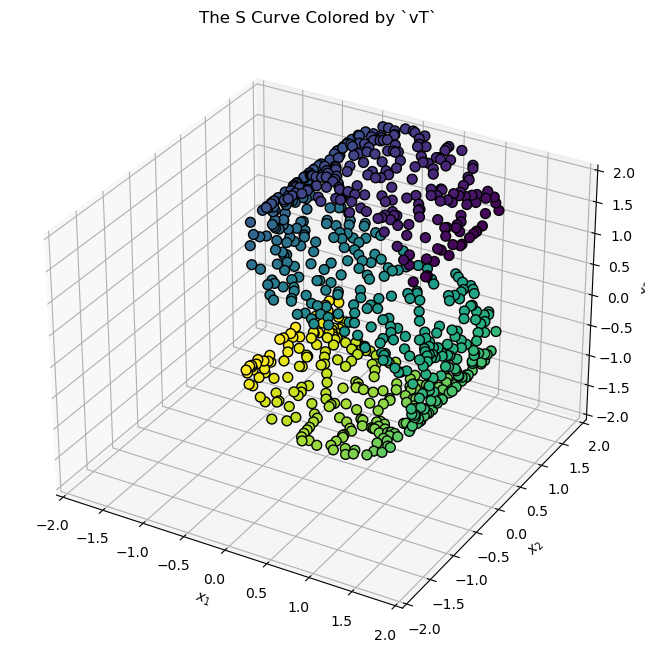

In [13]:
# Display the Data

hF = plt.figure(figsize = (8, 8))
hA = hF.add_subplot(projection = '3d')
hA.scatter(mX[:, 0], mX[:, 1], mX[:, 2], s = 50, c = vT, edgecolor = 'k', alpha = 1)
hA.set_xlim([-2, 2])
hA.set_ylim([-2, 2])
hA.set_zlim([-2, 2])
hA.set_xlabel('$x_1$')
hA.set_ylabel('$x_2$')
hA.set_zlabel('$x_3$')
hA.set_title('The S Curve Colored by `vT`')
plt.show()

In [14]:
import scipy.spatial

#===========================Fill This===========================#
# 1. Generate a pair wise distance function.
# !! You may and should utilize the parameter `vT`.
# !! Since we use the location data `vT` this is a geodesic like distance.
# !! You may add any parameters you need to the function.

def DistanceFunction( mX: np.ndarray, vT: np.ndarray ) -> np.ndarray:
    '''
    Calculates the kernel matrix of the Polynomial kernel.
    Args:
        mX - Input data with shape N x D.
        vT - Input data (Location)
    Output:
        mD - Pair wise distance matrix with shape N x N.
    Remarks:
        - You may use SciPy's `cdist()` and / or `pdist()`.
    '''

    mD = np.linalg.norm(mX - vT[:, np.newaxis], axis=-1)
#===============================================================#
    
    return mD

In [15]:
#===========================Fill This===========================#
# 1. Calculate the Distance Matrix `mD`.
# !! You may add any parameters you need to the function.

mD = DistanceFunction(mX, vT)

#===============================================================#

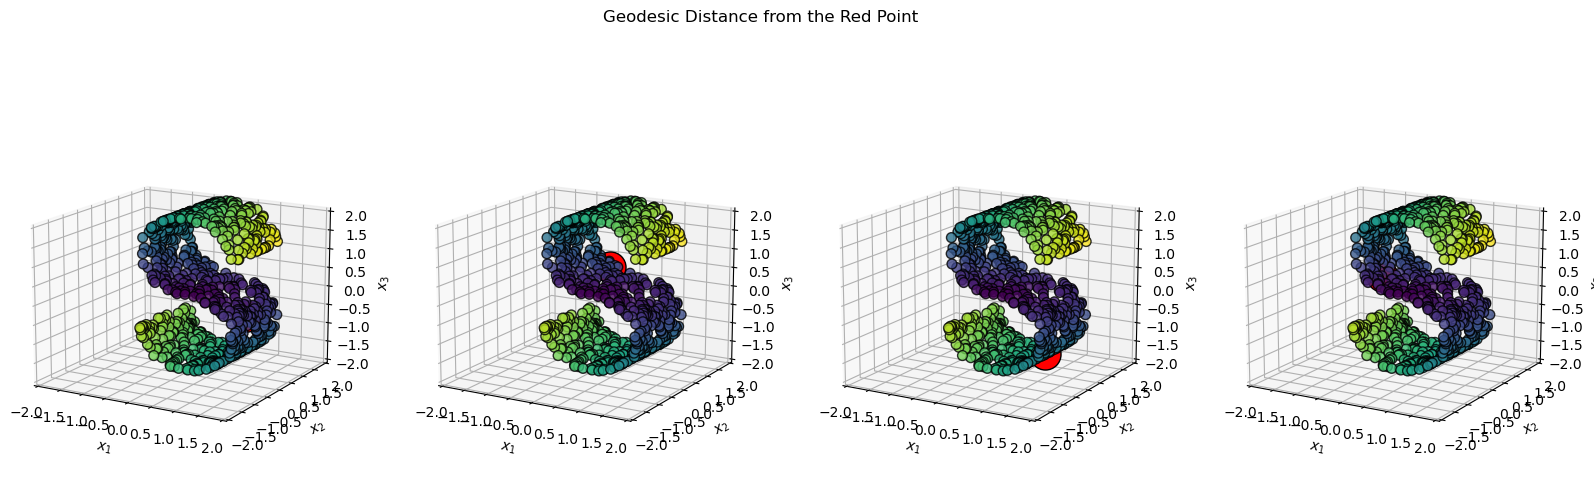

In [16]:
# Display the Distance Function for few Points
# The result should look like a local distance along the surface of the S curve.

vIdx = np.random.choice(N, numDispPts, replace = False)

hF = plt.figure(figsize = (20, 6))

for ii, idx in enumerate(vIdx):
    
    hA  = hF.add_subplot(1, numDispPts, ii + 1, projection = '3d')
    hA.scatter(*mX.T, s = 50, c = mD, edgecolor = 'k', alpha = 0.8)
    hA.scatter(*mX[idx], s = 500, c = 'r', edgecolor = 'k', alpha = 1)
    hA.set_xlim([-2, 2])
    hA.set_ylim([-2, 2])
    hA.set_zlim([-2, 2])
    hA.set_xlabel('$x_1$')
    hA.set_ylabel('$x_2$')
    hA.set_zlabel('$x_3$')
    
    hA.view_init(elev = 15, azim = 300)

hF.suptitle('Geodesic Distance from the Red Point')

plt.show()

In [17]:
#===========================Fill This===========================#
# 1. Create a Kernel Matrix from the distance matrix.
# 2. Apply the K-PCA (Manually or using SciKit Learn).

#===============================================================#

In [18]:
#===========================Fill This===========================#
# 1. Display the low dimension encoding of the data.

#===============================================================#

### 5.4.6. Solution

<font color='red'>??? Fill the answer here ???</font>

---

### 5.5. Question

One can suggest using the _PCA_ algorithm is for feature selection using the following concept:

 1. Calculate the 1st component of the PCA.
 2. Rank features by the their contribution to the linear combination.

Answer, shortly, on the following questions:

 * Can one use the K-PCA as improved feature selection as done above?
 * What do you think about this method for feature selection?



### 5.5. Solution

**Question - Can one use KPCA like PCA for feature selection?**

Yes, the same concept can be applied to KPCA. Rather than using the eigenvectors of the covariance matrix, we can use the eigenvectors of the centered kernel matrix.
The eigenvectors will show the contribution of each training sample to the principal component. This can give an indication of influential features.
However, the interpretation is less direct compared to linear PCA. The kernel maps data to a different space so the eigenvectors don't directly correspond to original features.

**Question - What do you think about this method for feature selection?**

It can provide some indication of important features, but isn't as straightforward as linear PCA.
The results may be harder to interpret due to the nonlinear kernel mapping.
This approach selects features that preserve variance, but variance may not correspond to relevance.
There are other techniques like mutual information, correlation, recursive feature elimination that may be better suited.
For KPCA specifically, techniques like sensitivity analysis that perturb features may be more interpretable.

Overall, we think KPCA can provide some feature selection information, but it is indirect and harder to interpret compared to other methods. The nonlinear mapping makes the eigenvectors less indicative of original feature importance. Other techniques are likely better suited for feature selection.

---

In [19]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')

Total Run Time: 3.7143030166625977 [Sec].
